# Temperature Conversion: Celsius to Fahrenheit using Neural Networks

This notebook demonstrates how to build a simple neural network to learn the relationship between Celsius and Fahrenheit temperatures.

This is simply a cleaner version of the [domestika_temperature_conversion.ipynb](domestika_temperature_conversion.ipynb) file. The model still doesn't learn well though.

For better model learning about the Celsius and Fahrenheit temperatures, refer to [this file](simple_temp_conversion.ipynb).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

## Load the Dataset

In [2]:
# Get the notebook path
import pathlib
notebook_path = pathlib.Path.cwd()

# Target directory (Project Root)
target_dir = 'ai_practice'
project_root = ''

# Iterate over the notebook_path until we find the target directory
for parent in notebook_path.parents:
    if parent.name == target_dir:
        project_root = parent
        
dataset_dir = 'domnic_celsius_to_fahrenheit/celsius.csv'
csv_path = project_root / 'assets/files' / dataset_dir

df = pd.read_csv(csv_path, sep=',')
df.head()

,Celsius,Fahrenheit
0,1169,2136.2
1,1280,2336.0
2,2380,4316.0
3,1508,2746.4
4,2015,3659.0


In [3]:
# Check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     16000 non-null  int64  
 1   Fahrenheit  16000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 250.1 KB


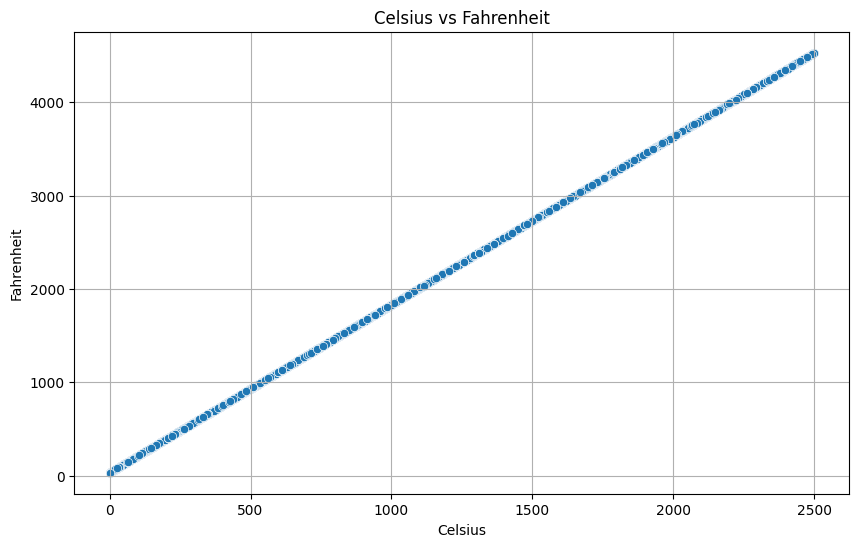

In [4]:
# Visualize the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Celsius', y='Fahrenheit')
plt.title('Celsius vs Fahrenheit')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.grid(True)
plt.show()

## Prepare the Data

Let's extract the features and target from the dataframe.

In [5]:
# Extract features and target
X = df.Celsius.values  # Input features
y = df.Fahrenheit.values  # Target values

## Normalize the Data

Normalizing the input features helps improve model training by scaling all values to a similar range.

In [6]:
# Apply Z-score normalization to input features
X_mean = X.mean()
X_std = X.std()
X_norm = (X - X_mean) / X_std

print(f"Mean: {X_mean}, Standard Deviation: {X_std}")

Mean: 1254.7360625, Standard Deviation: 726.3155691739618


## Create and Train the Model

We'll create a simple neural network with one input neuron and one output neuron. This can be thought of as learning a linear function, which is enough for the Celsius-to-Fahrenheit conversion.

In [7]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Create a simple model
model = keras.Sequential([
    keras.layers.Input(shape=(1,)),  # Input shape is (1,) for a single feature
    keras.layers.Dense(units=1)  # Output layer with one neuron
])

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),  # Lower learning rate for stability
    loss='mean_squared_error'  # MSE is appropriate for regression
)

In [8]:
# Train the model
history = model.fit(
    X_norm,  # Normalized input features
    y,       # Target values
    epochs=100,
    verbose=1
)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 6904231.5000
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 6869305.5000
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 6834596.5000
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 6800017.5000
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 6765556.0000
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 6731210.5000
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 6696973.5000
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 6662841.0000
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 6628809.0000
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 6594875.0000
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 6561041.5000
Epoch 12/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 6527300.0000
Epoch 13/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 6493658.5000
Epoch 14

## Visualize Training Progress

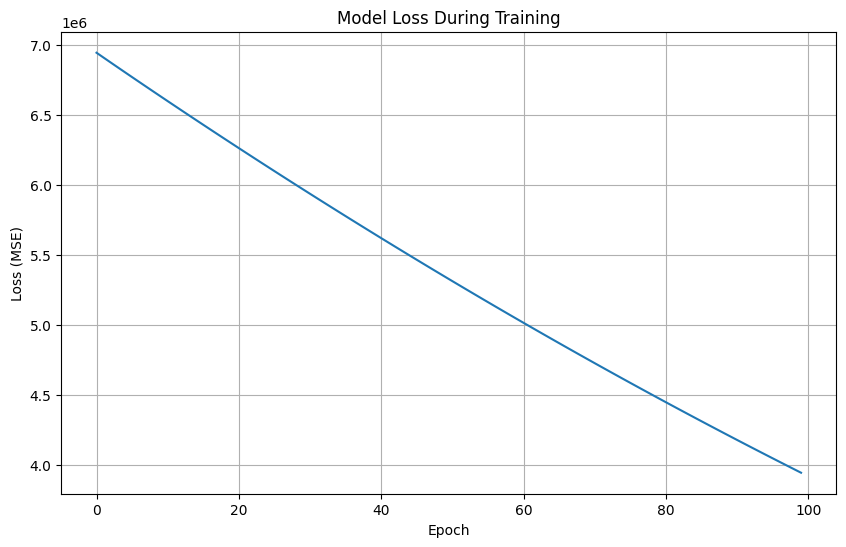

In [9]:
# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

## Examine the Learned Parameters

After training, we can examine the weight and bias that our model learned.

In [10]:
# Get the weights and bias
weight = model.layers[0].get_weights()[0][0][0]
bias = model.layers[0].get_weights()[1][0]

print(f"Learned Parameters - Weight: {weight}, Bias: {bias}")

# The formula for converting Celsius to Fahrenheit is: F = (9/5) * C + 32
# We can compare our learned parameters with the actual formula
print(f"The actual formula is F = (9/5) * C + 32, where 9/5 = {9/5} and 32 is the bias")

Learned Parameters - Weight: 463.6113586425781, Bias: 495.5362548828125
The actual formula is F = (9/5) * C + 32, where 9/5 = 1.8 and 32 is the bias


## Make Predictions

Let's use our model to make some predictions.

In [11]:
# Function to make predictions
def predict_fahrenheit(celsius_value):
    # Normalize the input value
    celsius_norm = (celsius_value - X_mean) / X_std
    # Make prediction
    fahrenheit_pred = model.predict(np.array([celsius_norm]).reshape(-1, 1))[0][0]
    return fahrenheit_pred

# Test with various temperatures
test_temps = [0, 10, 25, 100, -40]
for temp in test_temps:
    pred = predict_fahrenheit(temp)
    # Calculate the actual value using the formula F = (9/5) * C + 32
    actual = (9/5) * temp + 32
    print(f"{temp}°C → Predicted: {pred:.2f}°F, Actual: {actual:.2f}°F, Error: {abs(pred-actual):.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
0°C → Predicted: -305.37°F, Actual: 32.00°F, Error: 337.3690
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
10°C → Predicted: -298.99°F, Actual: 50.00°F, Error: 348.9858
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
25°C → Predicted: -289.41°F, Actual: 77.00°F, Error: 366.4113
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
100°C → Predicted: -241.54°F, Actual: 212.00°F, Error: 453.5383
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
-40°C → Predicted: -330.90°F, Actual: -40.00°F, Error: 290.9011


## Comparing Model Predictions with Actual Formula

Let's visualize how well our model approximates the temperature conversion formula.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

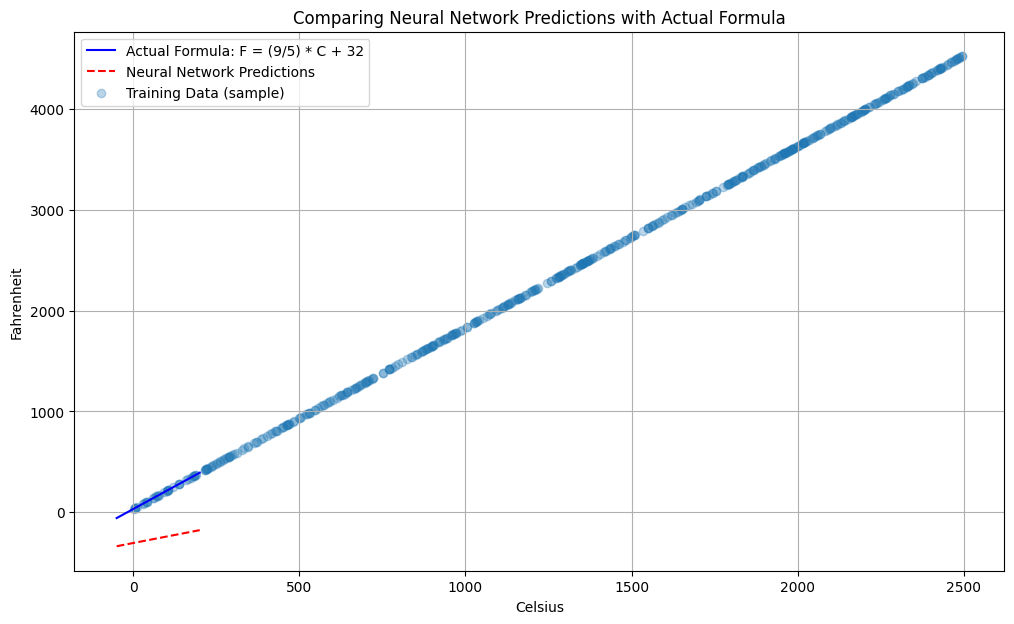

In [12]:
# Generate a range of Celsius temperatures
celsius_range = np.linspace(-50, 200, 500)

# Compute the actual Fahrenheit values using the formula
actual_fahrenheit = (9/5) * celsius_range + 32

# Predict Fahrenheit values using our model
predicted_fahrenheit = [predict_fahrenheit(c) for c in celsius_range]

# Plot both the actual formula and our model's predictions
plt.figure(figsize=(12, 7))
plt.plot(celsius_range, actual_fahrenheit, 'b-', label='Actual Formula: F = (9/5) * C + 32')
plt.plot(celsius_range, predicted_fahrenheit, 'r--', label='Neural Network Predictions')
plt.scatter(df.Celsius[:500], df.Fahrenheit[:500], alpha=0.3, label='Training Data (sample)')
plt.title('Comparing Neural Network Predictions with Actual Formula')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.legend()
plt.grid(True)
plt.show()

## Model with Hidden Layers

While a simple linear model is sufficient for this task, let's also create a model with hidden layers for comparison.

In [13]:
# Reset random seeds
tf.random.set_seed(42)
np.random.seed(42)

# Create a model with hidden layers
complex_model = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(16, activation='relu'),  # Hidden layer with 16 neurons
    keras.layers.Dense(8, activation='relu'),   # Hidden layer with 8 neurons
    keras.layers.Dense(1)                       # Output layer
])

# Compile the model
complex_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error'
)

# Train the model
complex_history = complex_model.fit(
    X_norm,
    y,
    epochs=100,
    verbose=1
)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 492us/step - loss: 4335767.0000
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 2579.7244
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 294.1950
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 15.6152
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 6.3939
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 4.3341
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 3.2501
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 2.4102
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 1.7142
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 1.1525
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 0.7094
Epoch 12/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 0.3832
Epoch 13/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.1852
Epoch 14/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.0865
Epo

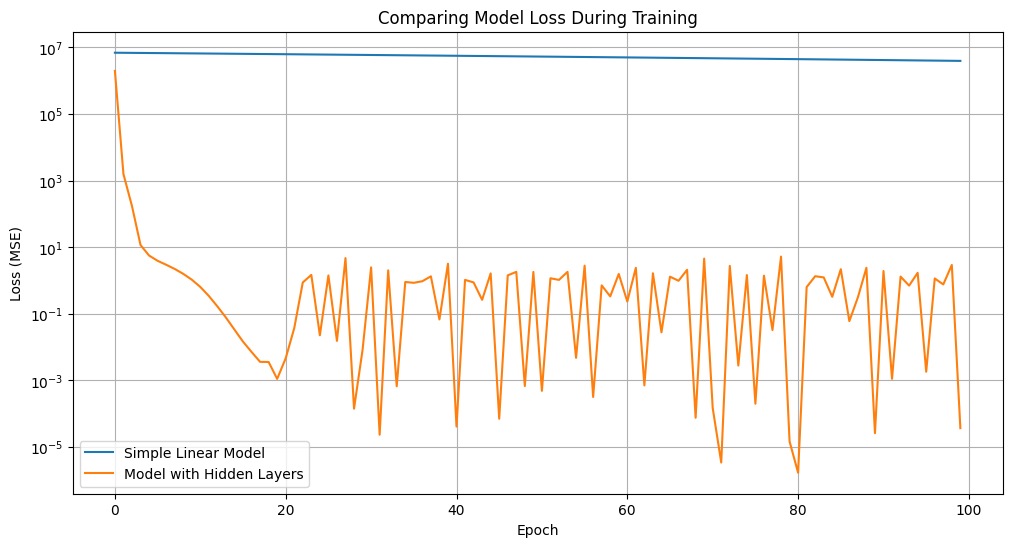

In [14]:
# Plot training loss for both models
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Simple Linear Model')
plt.plot(complex_history.history['loss'], label='Model with Hidden Layers')
plt.title('Comparing Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.yscale('log')  # Using log scale for better visualization
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Function to make predictions with the complex model
def predict_fahrenheit_complex(celsius_value):
    celsius_norm = (celsius_value - X_mean) / X_std
    fahrenheit_pred = complex_model.predict(np.array([celsius_norm]).reshape(-1, 1))[0][0]
    return fahrenheit_pred

# Compare predictions for both models
for temp in test_temps:
    simple_pred = predict_fahrenheit(temp)
    complex_pred = predict_fahrenheit_complex(temp)
    actual = (9/5) * temp + 32
    print(f"{temp}°C → Simple: {simple_pred:.2f}°F, Complex: {complex_pred:.2f}°F, Actual: {actual:.2f}°F")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
0°C → Simple: -305.37°F, Complex: 32.02°F, Actual: 32.00°F
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
10°C → Simple: -298.99°F, Complex: 50.00°F, Actual: 50.00°F
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
25°C → Simple: -289.41°F, Complex: 77.00°F, Actual: 77.00°F
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
100°C → Simple: -241.54°F, Complex: 212.00°F, Actual: 212.00°F
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
-40°C → Simple: -330.90°F, Complex: 29.13°F, Actual: -40.00°F


## Conclusion

In this notebook, we've demonstrated how to build neural network models for temperature conversion. We explored both a simple linear model and a more complex model with hidden layers. 

Key observations:
1. The temperature conversion is a linear relationship (F = (9/5) * C + 32), so even a simple model can learn it effectively.
2. Data normalization is crucial for effective model training.
3. While the complex model might achieve slightly better accuracy, the simpler model is more interpretable and efficient for this task.